**<font color = "darkred" size="5">ch12. 데이터프레임과 시리즈 (pandas) - II</font>**

In [17]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:11pt;}
div.output {font-size:11pt;}
div.input {font-family:Consolas; font-size:11pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 8. 데이터 그룹화 및 집계 

In [34]:
import pandas as pd 
import numpy as np
from statsmodels.api import datasets
iris_df = datasets.get_rdataset("iris", package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## (1) Group by

In [35]:
iris_df.groupby(iris_df.Species)['Sepal.Length'].sum()

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [36]:
# 종별 꽃받침 길이의 합계 
iris_df.pivot_table(index='Species',
                   values=['Sepal.Length'],
                   aggfunc='sum')

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [37]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped

In [38]:
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [39]:
iris_df.loc[1, 'Sepal.Length'] = np.nan

In [40]:
import random
            
rownum = random.sample(range(len(iris_df)), 4)
rownum

[21, 103, 118, 113]

In [41]:
for row in rownum:
    iris_df.loc[row, 'Sepal.Length'] = np.nan

In [42]:
iris_df.loc[rownum, 'Sepal.Length']

21    NaN
103   NaN
118   NaN
113   NaN
Name: Sepal.Length, dtype: float64

In [44]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,48,50,50,50
versicolor,50,50,50,50
virginica,47,50,50,50


**다중 열로 그룹화하기**

In [45]:
iris_df.groupby([iris_df["Species"], iris_df["Sepal.Length"]]).mean().head()

Sepal.Width  Petal.Length  Petal.Width
Species Sepal.Length                                        
setosa  4.3              3.000000      1.100000        0.100
        4.4              3.033333      1.333333        0.200
        4.5              2.300000      1.300000        0.300
        4.6              3.325000      1.325000        0.225
        4.7              3.200000      1.450000        0.200

In [46]:
iris_df.groupby([iris_df["Species"], iris_df["Sepal.Length"]]).describe()

Sepal.Width                                        \
                              count      mean       std  min    25%   50%   
Species    Sepal.Length                                                     
setosa     4.3                  1.0  3.000000       NaN  3.0  3.000  3.00   
           4.4                  3.0  3.033333  0.152753  2.9  2.950  3.00   
           4.5                  1.0  2.300000       NaN  2.3  2.300  2.30   
           4.6                  4.0  3.325000  0.221736  3.1  3.175  3.30   
           4.7                  2.0  3.200000  0.000000  3.2  3.200  3.20   
           4.8                  5.0  3.180000  0.204939  3.0  3.000  3.10   
           4.9                  3.0  3.266667  0.288675  3.1  3.100  3.10   
           5.0                  8.0  3.362500  0.192261  3.0  3.275  3.40   
           5.1                  7.0  3.585714  0.211570  3.3  3.450  3.50   
           5.2                  3.0  3.666667  0.378594  3.4  3.450  3.50   
           5.3                  1.0  3.700000       NaN  3.7  3.700  3.70   
           5.4                  5.0  3.660000  0.250998  3.4  3.400  3.70   
           5.5                  2.0  3.850000  0.494975  3.5  3.675  3.85   
           5.7                  2.0  4.100000  0.424264  3.8  3.950  4.10   
           5.8                  1.0  4.000000       NaN  4.0  4.000  4.00   
versicolor 4.9                  1.0  2.400000       NaN  2.4  2.400  2.40   
           5.0                  2.0  2.150000  0.212132  2.0  2.075  2.15   
           5.1                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.2                  1.0  2.700000       NaN  2.7  2.700  2.70   
           5.4                  1.0  3.000000       NaN  3.0  3.000  3.00   
           5.5                  5.0  2.440000  0.114018  2.3  2.400  2.40   
           5.6                  5.0  2.820000  0.216795  2.5  2.700  2.90   
           5.7                  5.0  2.820000  0.148324  2.6  2.800  2.80   
           5.8                  3.0  2.666667  0.057735  2.6  2.650  2.70   
           5.9                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.0                  4.0  2.800000  0.496655  2.2  2.575  2.80   
           6.1                  4.0  2.875000  0.095743  2.8  2.800  2.85   
           6.2                  2.0  2.550000  0.494975  2.2  2.375  2.55   
           6.3                  3.0  2.700000  0.529150  2.3  2.400  2.50   
           6.4                  2.0  3.050000  0.212132  2.9  2.975  3.05   
           6.5                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.6                  2.0  2.950000  0.070711  2.9  2.925  2.95   
           6.7                  3.0  3.066667  0.057735  3.0  3.050  3.10   
           6.8                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.9                  1.0  3.100000       NaN  3.1  3.100  3.10   
           7.0                  1.0  3.200000       NaN  3.2  3.200  3.20   
virginica  4.9                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.6                  1.0  2.800000       NaN  2.8  2.800  2.80   
           5.8                  3.0  2.733333  0.057735  2.7  2.700  2.70   
           5.9                  1.0  3.000000       NaN  3.0  3.000  3.00   
           6.0                  2.0  2.600000  0.565685  2.2  2.400  2.60   
           6.1                  2.0  2.800000  0.282843  2.6  2.700  2.80   
           6.2                  2.0  3.100000  0.424264  2.8  2.950  3.10   
           6.3                  5.0  2.940000  0.391152  2.5  2.700  2.80   
           6.4                  5.0  2.920000  0.216795  2.7  2.800  2.80   
           6.5                  4.0  3.050000  0.100000  3.0  3.000  3.00   
           6.7                  5.0  3.040000  0.328634  2.5  3.000  3.10   
           6.8                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.9                  3.0  3.133333  0.057735  3.1  3.100  3.10   
           7.1      

In [47]:
g = iris_df.groupby(iris_df.Species).mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006250,3.428,1.462,0.246
versicolor,5.936000,2.770,4.260,1.326
virginica,6.589362,2.974,5.552,2.026


- 범례 밖으로 빼기 예제 참조
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

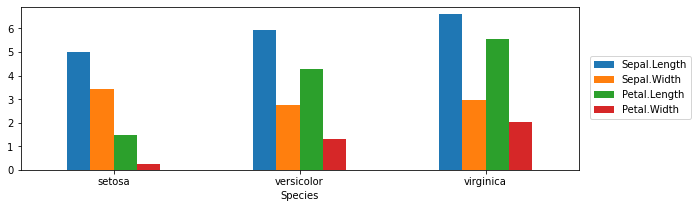

In [50]:
import matplotlib.pyplot as plt

g.plot(kind='bar', rot=0, figsize=(10,3))
plt.legend(bbox_to_anchor=(1.02, 0.7), loc=2, borderaxespad=0)\
# 위의 식은 위의 사이트를 참고함 

In [51]:
iris_df.groupby(iris_df.Species).describe().transpose()

Species                setosa  versicolor  virginica
Sepal.Length count  48.000000   50.000000  47.000000
             mean    5.006250    5.936000   6.589362
             std     0.359317    0.516171   0.620390
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.250000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [52]:
g = iris_df.groupby([iris_df['Species'], iris_df['Petal.Width']]).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.975000     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.333333     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.460000     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.840000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.800000     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [53]:
g.unstack() # 끝에 위치한 Petal.Width를 컬럼값으로

Sepal.Length                                                      \
Petal.Width          0.1    0.2       0.3       0.4  0.5  0.6       1.0  1.1   
Species                                                                        
setosa              4.82  4.975  4.971429  5.333333  5.1  5.0       NaN  NaN   
versicolor           NaN    NaN       NaN       NaN  NaN  NaN  5.414286  5.4   
virginica            NaN    NaN       NaN       NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [54]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.975000         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.333333         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

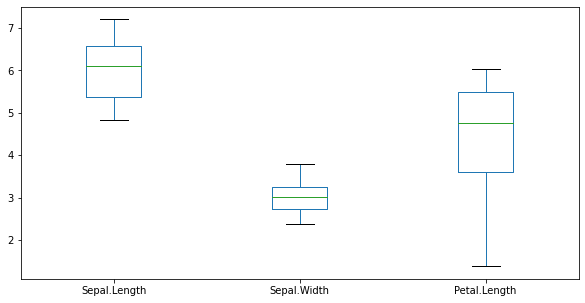

In [56]:
g.plot.box(figsize=(10,5))

In [57]:
g = iris_df.groupby([iris_df['Species'], iris_df['Petal.Width']])['Sepal.Length'].mean()
g

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.975000
            0.3            4.971429
            0.4            5.333333
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.460000
            1.9            6.340000
            2.0            6.840000
            2.1            6.916667
            2.2            6.866667
            2.3            6.800000
            2.4            6.266667
            2.5            6.733333
Name

In [58]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.975,4.971429,5.333333,5.1,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,...,6.1,6.7,5.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,4.9,6.46,6.34,6.84,6.916667,6.866667,6.8,6.266667,6.733333


In [61]:
pd.options.display.max_columns

20

In [62]:
pd.options.display.max_columns = 22 # 최대 열 수 늘리기 

In [63]:
g.unstack().T

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.975000,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.333333,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## (2) 그룹간 데이터

In [64]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group

In [66]:
for idx, grouped in enumerate(iris_group):
    print(idx, '번째 그룹: ')
    print(grouped)
    print('---------------------------------------------------------------')

0 번째 그룹: 
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            NaN          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14  

In [67]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', species_name)
    print(group.sample(5).sort_index()) # 무작위로 다섯행 추출해서 오름차순정렬
    print("-----------------------------------------------------------------")

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
20           5.4          3.4           1.7          0.2  setosa
25           5.0          3.0           1.6          0.2  setosa
31           5.4          3.4           1.5          0.4  setosa
-----------------------------------------------------------------
1 번째 그룹은 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
56           6.3          3.3           4.7          1.6  versicolor
65           6.7          3.1           4.4          1.4  versicolor
71           6.1          2.8           4.0          1.3  versicolor
77           6.7          3.0           5.0          1.7  versicolor
84           5.4          3.0           4.5          1.5  versicolor
-----------------------------------------------------------------
2 번째 그룹은 virginica
     Sepa

## (3) 데이터프레임 그룹 인덱싱

In [69]:
# for idx, (specie_name, group) in enumerate(iris_group):
#     print(idx,'번째 그룹은 ', specie_name)
#     print(group.iloc[[1,11],:])
#     print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
t = iris_df.groupby(iris_df.Species).take([1,11,21,31]) 
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     1             NaN          3.0           1.4          0.2
           11            4.8          3.4           1.6          0.2
           21            NaN          3.7           1.5          0.4
           31            5.4          3.4           1.5          0.4
versicolor 51            6.4          3.2           4.5          1.5
           61            5.9          3.0           4.2          1.5
           71            6.1          2.8           4.0          1.3
           81            5.5          2.4           3.7          1.0
virginica  101           5.8          2.7           5.1          1.9
           111           6.4          2.7           5.3          1.9
           121           5.6          2.8           4.9          2.0
           131           7.9          3.8           6.4          2.0

In [70]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,NaN,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,NaN,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4


## (4) 레이블(원핫인코딩)

In [71]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
iris_df.Species.describe()

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

In [75]:
# 레이블을 지원하는 패키지 이용 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['Species'])
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,NaN,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9. 데이터 구조 변경 

## (1) 와이드 포맷 / 롱 포맷

- 판다스 공식문서에 나오는 melt:
- https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt

In [77]:
import statsmodels.api as sm

airquality_data = sm.datasets.get_rdataset('airquality')
airquality = airquality_data.data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## (2) melt를 이용한 언피벗팅

In [78]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'])
airquality_melted 

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [79]:
airquality.melt(id_vars=['Month', 'Day'],
                var_name='변수',
                value_name='값')

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [80]:
airquality_melted_sort = airquality_melted.sort_values(by=['Month', 'Day'])
airquality_melted_sort.head() 

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


In [82]:
airquality.head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1


In [84]:
airquality.melt(id_vars=['Month','Day'])
# pd.melt(airquality, id_vars=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


## (3) pivot_table을 이용한 피벗팅(롱형->와이드형)

In [93]:
# 멜트된 데이터 프레임 : airquality_melted , airquality_melted_sort
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                                            columns=['variable'],
                                            values=['value'])
airquality2.head(1)

value                   
variable  Ozone Solar.R  Temp Wind
Month Day                         
5     1    41.0   190.0  67.0  7.4

In [88]:
airquality2.loc[5].head()

value                    
variable Ozone Solar.R  Temp  Wind
Day                               
1         41.0   190.0  67.0   7.4
2         36.0   118.0  72.0   8.0
3         12.0   149.0  74.0  12.6
4         18.0   313.0  62.0  11.5
5          NaN     NaN  56.0  14.3

In [94]:
airquality2 = airquality2.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality2

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [95]:
airquality2.columns

MultiIndex([(     '',   'Month'),
            (     '',     'Day'),
            ('value',   'Ozone'),
            ('value', 'Solar.R'),
            ('value',    'Temp'),
            ('value',    'Wind')],
           names=[None, 'variable'])

In [96]:
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [ ]:
# airquality_melted_sort 데이터 프레임을 와이드형으로 